![](https://api.brandy.run/core/core-logo-wide)

# Unsupervised Learning: Clustering

Cuando hablamos de `Usupervised Learning` nos referimos a aquellos problemas de Machine Learning que carecen de **Ground Truth** o Etiquetado. 

En estos casos, los algoritmos de Machine Learning que podemos usar se centran en aprender patrones sobre los datos para, por ejemplo, dividirlos en grupos.
A este problema en concreto, se le llama `Clustering`.

<img src="https://www.researchgate.net/profile/Absalom-Ezugwu/publication/344590665/figure/fig1/AS:945789706702848@1602505246144/Clustering-example-with-intra-and-inter-clustering-illustrations.png" width="400"/>

- https://en.wikipedia.org/wiki/Unsupervised_learning

In [3]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# Cargamos el dataset de las flores iris
data = load_iris()
datapoints, features =data["data"].shape
print(f"This dataset contains ➡️ datapoints={datapoints} features={features}")

This dataset contains ➡️ datapoints=150 features=4


## K-Means: Clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean 
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.

- https://scikit-learn.org/stable/modules/clustering.html#k-means

In [4]:
X , y = pd.DataFrame(data.data, columns=data.feature_names) , data.target
print("Labels: ",data.target_names)
X.head()

Labels:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'Compare features With Labels')

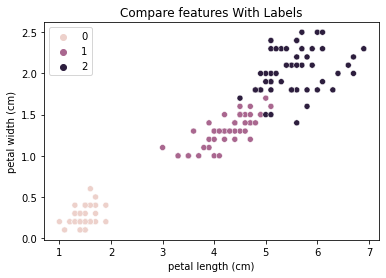

In [5]:
sns.scatterplot(data=X, x="petal length (cm)",y="petal width (cm)", hue=y).set_title('Compare features With Labels')

Text(0.5, 1.0, 'Compare features Without Labels')

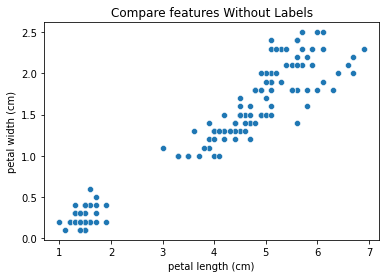

In [6]:
sns.scatterplot(data=X, x="petal length (cm)",y="petal width (cm)").set_title("Compare features Without Labels")

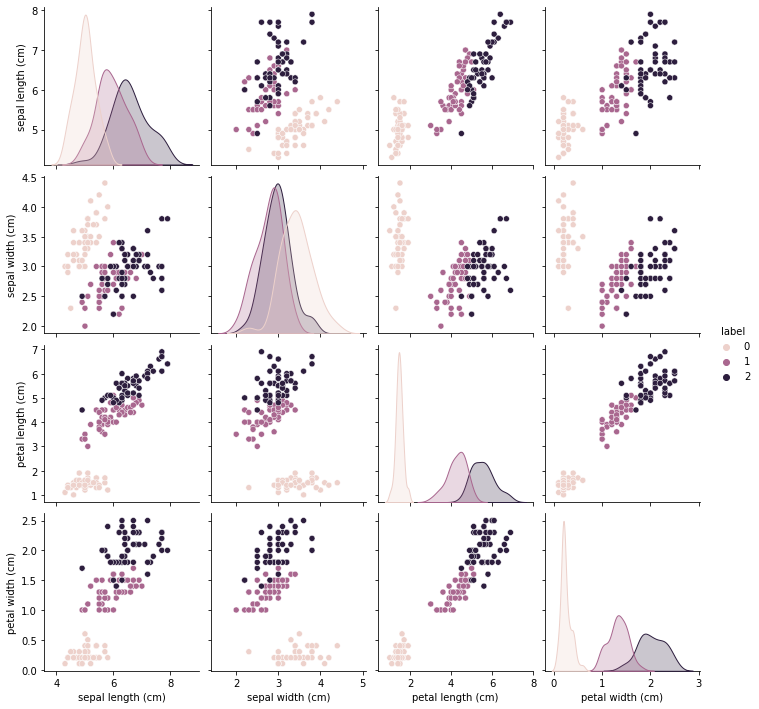

In [7]:
# Creamos un dataset incluyendo el label
df = X.copy()
df["label"] = y

# Revisamos todas las features del dataset 
sns.pairplot(data=df, hue="label")

In [8]:
from sklearn.cluster import KMeans

# Generamos un dataframe con las features que vamos a entrenar
iris = X[["petal length (cm)","petal width (cm)"]]

# Entrenamos KMeans: IMPORTANTE, por defecto la   Por lo tanto tendremos 8 centroides
kmeans = KMeans()
kmeans.fit(iris)

# Imprimimos los centroides de los clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[3.41428571 1.05714286]
 [5.         1.785     ]
 [1.462      0.246     ]
 [6.39       2.16      ]
 [4.53478261 1.42173913]
 [5.68571429 1.71428571]
 [4.0375     1.2375    ]
 [5.53529412 2.25882353]]


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

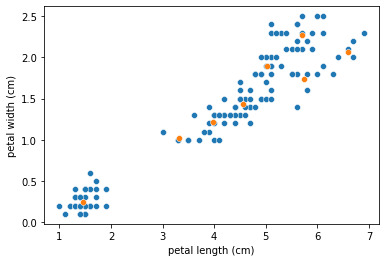

In [21]:
# Colocamos los centroides junto con las features para visualizarlos
sns.scatterplot(data=X, x="petal length (cm)",y="petal width (cm)")
sns.scatterplot(x=centroids[:,0],y=centroids[:,1])

### Etiquetamos los datos segun proximidad

Algoritmo de voronoi:

- https://gisgeography.com/voronoi-diagram-thiessen-polygons/
- https://cfbrasz.github.io/VoronoiColoringSavePNG.html

In [197]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 7, 3, 3, 3, 0, 3, 7, 0, 7, 7, 3, 0, 3,
       3, 7, 3, 7, 6, 7, 3, 3, 7, 3, 3, 6, 3, 0, 7, 0, 7, 6, 3, 3, 3, 3,
       7, 7, 3, 3, 7, 0, 7, 7, 7, 7, 0, 7, 2, 6, 2, 5, 2, 4, 3, 4, 5, 2,
       6, 6, 2, 6, 6, 2, 5, 4, 4, 6, 2, 6, 4, 6, 2, 5, 6, 6, 2, 5, 5, 4,
       2, 6, 5, 2, 2, 5, 6, 2, 2, 6, 6, 2, 2, 6, 6, 6, 2, 6], dtype=int32)

In [23]:
# Podemos guardar el cluster asignado. es decir, generamos un groundtruth sintético
y_pred = kmeans.predict(iris)

In [25]:
print(y_pred)
print(y_pred == kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 6 2 2 2 4 2 6 4 2 6 2 6 2 2 6 2 6 3 6 2 2
 2 2 2 3 2 4 6 6 6 3 2 2 2 2 6 6 2 2 6 4 6 6 6 2 4 6 0 3 0 5 0 7 2 7 5 0 3
 3 0 3 3 0 5 7 7 3 0 3 7 3 0 5 3 3 0 5 5 7 0 3 5 0 0 5 3 0 0 3 3 0 0 3 3 3
 0 3]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True 

In [34]:
# Reentrenamos KMeans, esta vez con solo 3 clústers
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

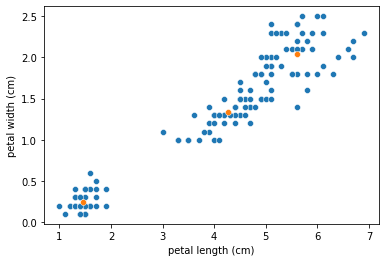

In [35]:
# Revisamos los resultados de los entrenamientos, mejor verdad?
sns.scatterplot(data=X, x="petal length (cm)",y="petal width (cm)")
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1])

In [36]:
y_pred = kmeans.predict(iris)

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

"""True Positives""":

In [39]:
np.logical_and(y==0,y_pred==0).sum()

0

In [40]:
np.logical_and(y==1,y_pred==2).sum()

48

In [41]:
np.logical_and(y==2,y_pred==1).sum()

0

In [42]:
y.shape

(150,)

## DBSCAN Clustering

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

La función `kneighbors` encuentra los `K` vecinos mas cercanos a un punto, pero para ello tenemos que entrenar usando `NearestNeighbors`

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors

In [49]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(iris)
dist, ind = nn.kneighbors(iris)

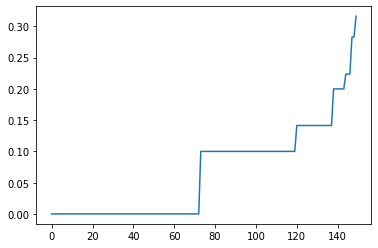

In [50]:
# Como podemos ver, los puntos en el eje Y, se van alejando progresivamente, esto es 
plt.plot(sorted(dist[:,1]))

## Métricas de clústering: Silouette Coefficient

La métrica toma valores entre 0 y 1:

* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

Referencias: 

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
- https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished.&text=a%3D%20average%20intra%2Dcluster%20distance,each%20point%20within%20a%20cluster.

### ¿Qué es el EPS en DBSCAN?

- epsfloat, default=0.5

Is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

In [64]:
from sklearn.metrics import silhouette_score

# Definimos que valores de EPS vamos a tener en cuenta
eps = np.linspace(0.05,0.25,10,20)

# Entrenamos DBSCAN con diferentes EPS y extraemos silouette score
silhouette = []
for n in eps:
    dbscan = DBSCAN(eps=n)
    dbscan.fit(iris)
    try:
        silhouette.append((n,silhouette_score(iris, dbscan.labels_)))
    except e:
        print(e)
        pass

In [65]:
sorted(silhouette, key=lambda x: x[1], reverse=True)

[(0.2277777777777778, 0.537938096427142),
 (0.25, 0.537938096427142),
 (0.20555555555555555, 0.4004076426656471),
 (0.16111111111111112, 0.29987380608269476),
 (0.18333333333333335, 0.29987380608269476),
 (0.11666666666666667, 0.1779153028641212),
 (0.1388888888888889, 0.1779153028641212),
 (0.05, -0.3613351091871037),
 (0.07222222222222223, -0.3613351091871037),
 (0.09444444444444444, -0.3613351091871037)]

In [66]:
dbscan = DBSCAN(0.22894736842105262)
dbscan.fit(iris)

DBSCAN(eps=0.22894736842105262)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

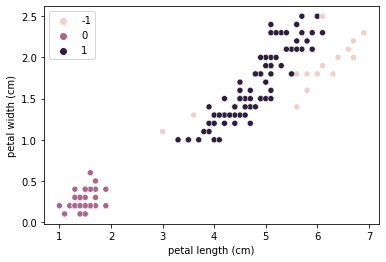

In [67]:
# Revisamos el resultado del clustering con dbscan
sns.scatterplot(x=iris.iloc[:,0],y=iris.iloc[:,1], hue=dbscan.labels_)

In [68]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## DBSCAN: El algoritmo perfecto para datos gaussianos

In [ ]:
# make_blobs: Generate isotropic Gaussian blobs
from sklearn.datasets import make_blobs

In [25]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [26]:
X,y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

<AxesSubplot:>

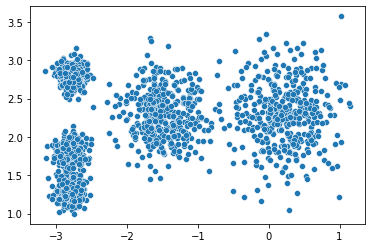

In [27]:
sns.scatterplot(x=X[:,0],y=X[:,1])

In [28]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

## Encontrando la K ideal con Kmeans

### Métrica `Inercia` en KMeans

-  https://scikit-learn.org/stable/modules/clustering.html

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

* Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
* Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

In [29]:
kmeans.inertia_

124.28407295202678

In [30]:
n_clusters = range(1,12)
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

<AxesSubplot:>

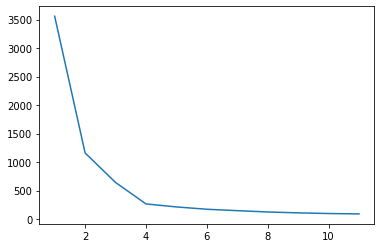

In [31]:
sns.lineplot(x=n_clusters, y=inertias)

In [59]:
inertias[2],inertias[3]

(650.4974609809051, 264.8547335081411)

In [60]:
inertias[3],inertias[4]

(264.8547335081411, 215.6122634338668)

<AxesSubplot:>

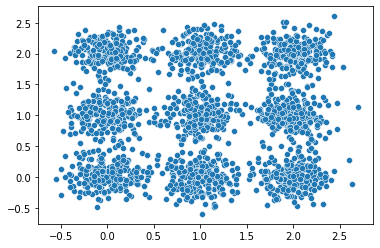

In [63]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

side = 3
centroids = np.array([[i,j,0.2] for i in range(side) for j in range(side)])
centers = centroids[:,0:2]
std = centroids[:,2]

X,y = make_blobs(n_samples=2000, centers=centers, cluster_std=std)
sns.scatterplot(x=X[:,0],y=X[:,1])

In [64]:
n_clusters = range(1,30)
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

<AxesSubplot:>

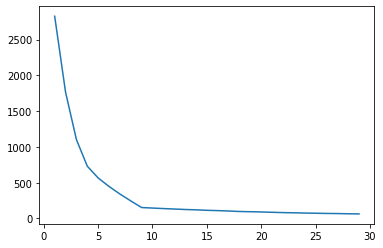

In [65]:
 sns.lineplot(x=n_clusters, y=inertias)

### Calculando el Silhouete Score de nuevo

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [68]:
silhouette_score(X, kmeans.labels_)

0.5299206218874706

In [69]:
n_clusters = range(2,40)
silhouete = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    silhouete.append(silhouette_score(X,kmeans.labels_))

<AxesSubplot:>

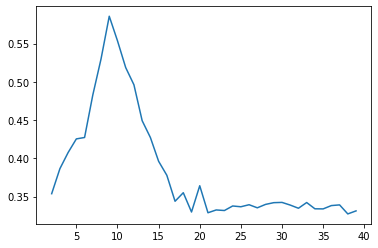

In [71]:
sns.lineplot(x=n_clusters, y=silhouete)

In [74]:
np.argmax(silhouete)

7

<AxesSubplot:>

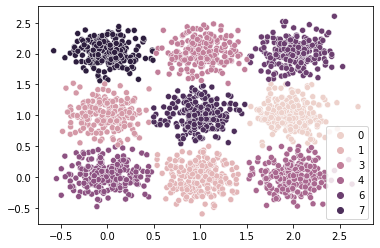

In [77]:
k = 9
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
sns.scatterplot(x=X[:,0],y=X[:,1], hue=kmeans.labels_)

<AxesSubplot:>

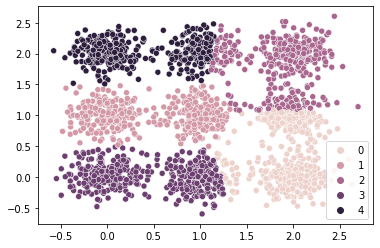

In [78]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
sns.scatterplot(x=X[:,0],y=X[:,1], hue=kmeans.labels_)

## DBSCAN

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [81]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

NearestNeighbors(n_neighbors=2)

In [82]:
dist, ind = nn.kneighbors(X)

In [83]:
dist

array([[0.        , 0.07141746],
       [0.        , 0.00689107],
       [0.        , 0.07249831],
       ...,
       [0.        , 0.01468691],
       [0.        , 0.0937264 ],
       [0.        , 0.01901153]])

In [84]:
ind

array([[   0,  584],
       [   1, 1919],
       [   2, 1043],
       ...,
       [1997, 1510],
       [1998, 1428],
       [1999, 1622]])

In [85]:
from matplotlib import pyplot as  plt

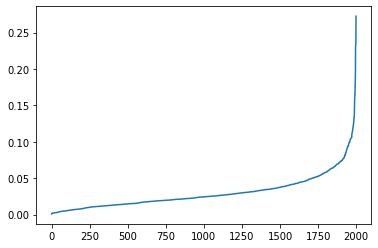

In [86]:
plt.plot(sorted(dist[:,1]))

In [87]:
eps = np.linspace(0.05,0.3,20)

silhouette = []
for n in eps:
    dbscan = DBSCAN(eps=n)
    dbscan.fit(X)
    try:
        silhouette.append((n,silhouette_score(X, dbscan.labels_)))
    except:
        pass

In [88]:
silhouette = np.array(silhouette)

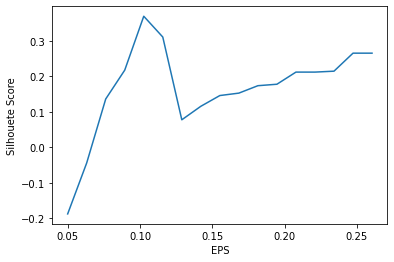

In [89]:
sns.lineplot(x=silhouette[:,0],y=silhouette[:,1])
plt.xlabel("EPS")
plt.ylabel("Silhouete Score");

In [90]:
sorted(silhouette, key=lambda x: x[1], reverse=True)[0]

array([0.10263158, 0.36993507])

In [97]:
dbscan = DBSCAN(0.1026315)

In [98]:
dbscan.fit(X)

DBSCAN(eps=0.1026315)

<AxesSubplot:>

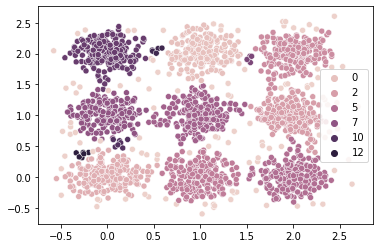

In [99]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=dbscan.labels_)

In [1]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

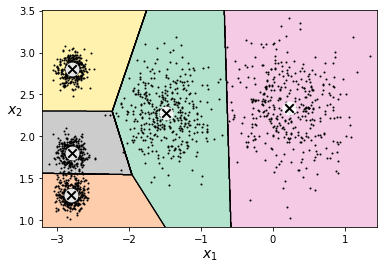

In [128]:
plot_decision_boundaries(kmeans, X)

## Comparing

In [172]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)

<AxesSubplot:>

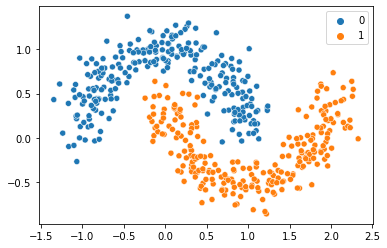

In [173]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [174]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

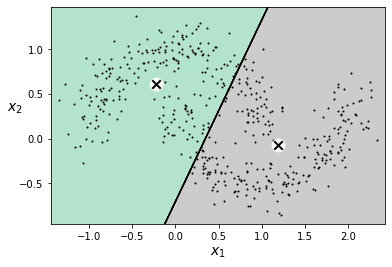

In [175]:
plot_decision_boundaries(kmeans, X)

In [176]:
dbscan = DBSCAN(0.14)
dbscan.fit(X)

DBSCAN(eps=0.14)

In [177]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(X)

NearestNeighbors(n_neighbors=2)

In [178]:
dist, ind = nn.kneighbors(X)

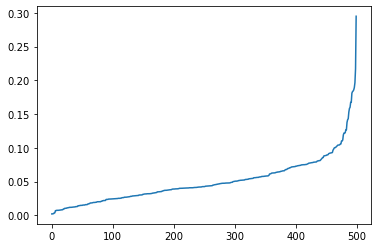

In [179]:
plt.plot(sorted(dist[:,1]))

In [180]:
eps = np.linspace(0.05,0.20,100)

silhouette = []
for n in eps:
    dbscan = DBSCAN(eps=n)
    dbscan.fit(X)
    try:
        silhouette.append((n,silhouette_score(X, dbscan.labels_)))
    except:
        pass

In [181]:
silhouette = np.array(silhouette)

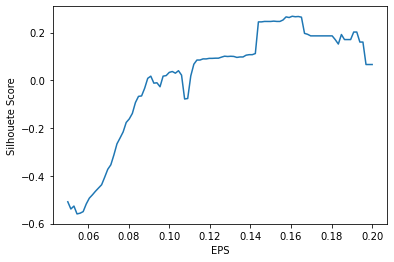

In [182]:
sns.lineplot(x=silhouette[:,0],y=silhouette[:,1])
plt.xlabel("EPS")
plt.ylabel("Silhouete Score");

In [183]:
sorted(silhouette, key=lambda x: x[1], reverse=True)[0]

array([0.16060606, 0.26880915])

In [185]:
dbscan = DBSCAN(0.16060606)
dbscan.fit(X)

DBSCAN(eps=0.16060606)

<AxesSubplot:>

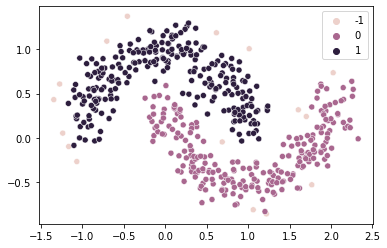

In [186]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=dbscan.labels_)